   children   charges  Hospital tier  City tier  State ID  age  BMI  HBA1C  \
0         0  63770.43              1          3      1013   55    3      1   
1         0  62592.87              2          3      1013   47    3      1   
2         1  58571.07              1          3      1024   33    3      0   
3         0  55135.40              1          2      1012   35    3      0   
4         0  52590.83              1          3      1011   62    0      0   

   Heart Issues  Any Transplants  Cancer history  NumberOfMajorSurgeries  \
0             0                0               0                       0   
1             1                0               0                       0   
2             0                0               0                       1   
3             0                0               0                       0   
4             1                0               1                       1   

   smoker  gender  
0       1       0  
1       0       0  
2       0     

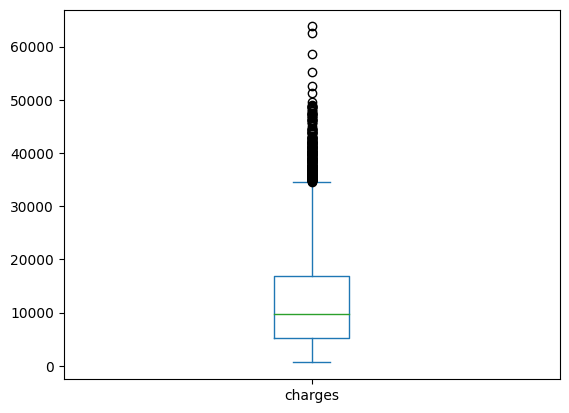

Validation MAE: 5538.028935832575
Test MAE: 5525.161118706451


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Load the dataset
df=pd.read_csv("https://github.com/2256haradityam/dataset/raw/main/md.csv")
df.head()

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Plot a boxplot of the 'charges' column to visualize outliers
df['charges'].plot(kind='box')
plt.show()

# Remove outliers based on the Interquartile Range (IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Convert categorical variables to one-hot encoded variables
df_one_hot = pd.get_dummies(df)

# Define features (X) and target (y)
X = df_one_hot.drop("charges", axis=1)
y = df_one_hot["charges"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Normalize the feature data using Min-Max scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = model.predict(X_val)

# Calculate and print Mean Absolute Error on the validation set
val_mae = mean_absolute_error(y_val, y_val_pred)
print(f"Validation MAE: {val_mae}")

# Predict on the test set
y_test_pred = model.predict(X_test)

# Calculate and print Mean Absolute Error on the test set
test_mae = mean_absolute_error(y_test, y_test_pred)
print(f"Test MAE: {test_mae}")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np

# Load dataset
df = pd.read_csv('https://github.com/2256haradityam/dataset/raw/main/md.csv')

df['charges'] = df['charges'].apply(lambda x: 1000 if x <= 1000 else
                                                 2000 if 1000 < x <= 2000 else
                                                 9000 if 2000 < x <= 15000 else
                                                 19000 if 15000 < x <= 22000 else
                                                 28000 if 22000 < x <= 32000 else
                                                 42000 if 32000 < x <= 43000 else
                                                 47000 if 43000 < x <= 49000 else
                                                 64000 if 49000 < x <= 64000 else x)

df['age'] = df['age'].apply(lambda x: 0 if x <=23 else 1 if 23<x<=28 else 2 if 28<x<=33 else 3 if 33<x<=38 else 4 if 38<x<=43 else 5 if 43<x<=48 else 6 if 48<x<=53 else 7 if 53<x<=58 else 8 if 58<x<=63 else 9 if 63<x<=68 else x)
df['children'] = df['children'].apply(lambda x: 0 if x == 0 else 1 if x == 1 else 2 if x == 2 else 3 if x == 3 else 4 if x >= 4 else x)
df['State ID'] = df['State ID'].apply(lambda x: 0 if x == 1011 else 1 if 1011< x <= 1013 else 2 if 1013<x <= 1019 else 3 if 1019<x <= 1023 else 4 if 1023<x <= 1024 else 5 if 1024<x <= 1026 else x)

# Separate features and target variable
X = df.drop('charges', axis=1)
y = df['charges']

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing pipelines for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply preprocessing
X_preprocessed = preprocessor.fit_transform(X)


In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Train models
for name, model in models.items():
    model.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate models
evaluation_results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_val_pred = model.predict(X_val)
    evaluation_results[name] = {
        'VMAE' : mean_absolute_error(y_val, y_val_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R²': r2_score(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
    }

# Display evaluation results
for name, metrics in evaluation_results.items():
    print(f"Model: {name}")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")


Model: Linear Regression
  VMAE: 7899.8534
  MAE: 7822.5255
  MSE: 102891834.1121
  R²: 0.3292
  RMSE: 10143.5612
Model: Ridge Regression
  VMAE: 7899.3180
  MAE: 7821.9579
  MSE: 102889037.7972
  R²: 0.3292
  RMSE: 10143.4234
Model: Lasso Regression
  VMAE: 7899.6641
  MAE: 7822.0625
  MSE: 102883805.3273
  R²: 0.3293
  RMSE: 10143.1654
Model: Decision Tree
  VMAE: 5681.4516
  MAE: 6441.9355
  MSE: 157069354.8387
  R²: -0.0240
  RMSE: 12532.7313
Model: Random Forest
  VMAE: 5803.4884
  MAE: 6138.6778
  MSE: 93483832.2910
  R²: 0.3905
  RMSE: 9668.7038


In [ ]:
best_model_name = min(evaluation_results, key=lambda x: evaluation_results[x]['MAE'])
best_model = models[best_model_name]

print(f"The best model is: {best_model_name}")


The best model is: Random Forest


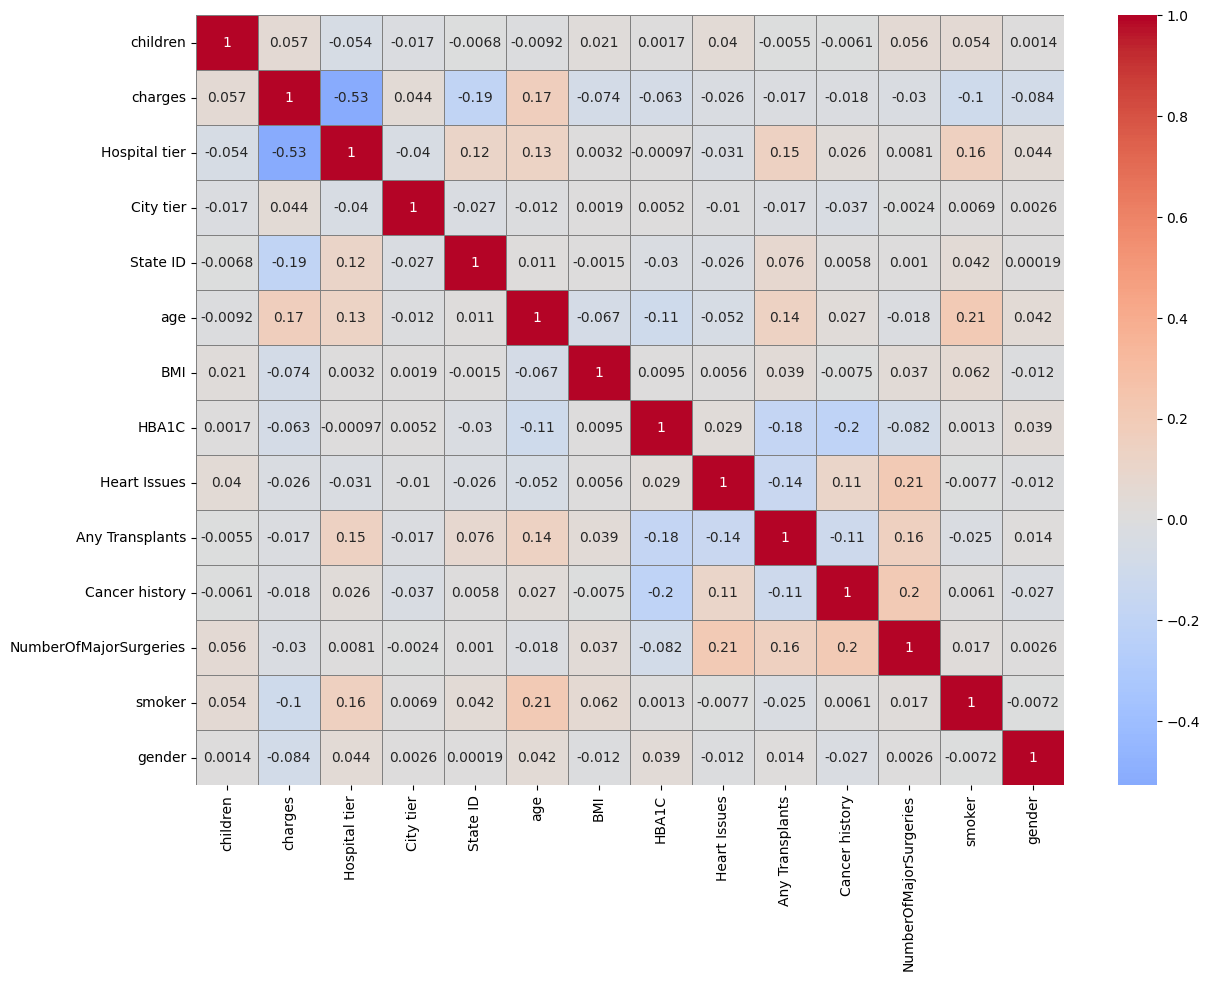

In [ ]:
import seaborn as sns
corr_matrix = df.corr()
plt.figure(figsize=(14, 10))  # Increase size for better visibility

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, linecolor='gray')

# Display the heatmap
plt.show()

In [ ]:
hdn = df.copy()

In [ ]:
hdn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2322 entries, 0 to 2321
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   children                2322 non-null   int64
 1   charges                 2322 non-null   int64
 2   Hospital tier           2322 non-null   int64
 3   City tier               2322 non-null   int64
 4   State ID                2322 non-null   int64
 5   age                     2322 non-null   int64
 6   BMI                     2322 non-null   int64
 7   HBA1C                   2322 non-null   int64
 8   Heart Issues            2322 non-null   int64
 9   Any Transplants         2322 non-null   int64
 10  Cancer history          2322 non-null   int64
 11  NumberOfMajorSurgeries  2322 non-null   int64
 12  smoker                  2322 non-null   int64
 13  gender                  2322 non-null   int64
dtypes: int64(14)
memory usage: 254.1 KB


In [ ]:
hdn.drop(['City tier' ,'Cancer history','gender','BMI','HBA1C','children','Heart Issues','Any Transplants','NumberOfMajorSurgeries'],axis = 1,inplace=True)

In [ ]:
x = hdn.drop('charges', axis=1)
y = hdn['charges']

# Identify numerical and categorical columns
numerical_cols = x.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = x.select_dtypes(include=['object']).columns

# Preprocessing pipelines for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply preprocessing
x_preprocessed = preprocessor.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_preprocessed, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Train models
for name, model in models.items():
    model.fit(x_train, y_train)

In [ ]:
evaluation_results = {}

for name, model in models.items():
    y_pred = model.predict(x_test)
    y_val_pred = model.predict(x_val)
    evaluation_results[name] = {
        'VMAE' : mean_absolute_error(y_val, y_val_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R²': r2_score(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
    }

# Display evaluation results
for name, metrics in evaluation_results.items():
    print(f"Model: {name}")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

Model: Linear Regression
  VMAE: 8007.9115
  MAE: 7757.5692
  MSE: 100904418.3151
  R²: 0.3422
  RMSE: 10045.1191
Model: Ridge Regression
  VMAE: 8007.4005
  MAE: 7757.1651
  MSE: 100904237.2341
  R²: 0.3422
  RMSE: 10045.1101
Model: Lasso Regression
  VMAE: 8007.7454
  MAE: 7757.3915
  MSE: 100904826.2542
  R²: 0.3422
  RMSE: 10045.1394
Model: Decision Tree
  VMAE: 5722.5826
  MAE: 5654.7403
  MSE: 85074961.0511
  R²: 0.4454
  RMSE: 9223.6089
Model: Random Forest
  VMAE: 5638.0062
  MAE: 5675.3058
  MSE: 84285580.9468
  R²: 0.4505
  RMSE: 9180.7179


In [ ]:
best_model_name = min(evaluation_results, key=lambda x: evaluation_results[x]['MAE'])
best_model = models[best_model_name]

print(f"The best model is: {best_model_name}")

The best model is: Decision Tree


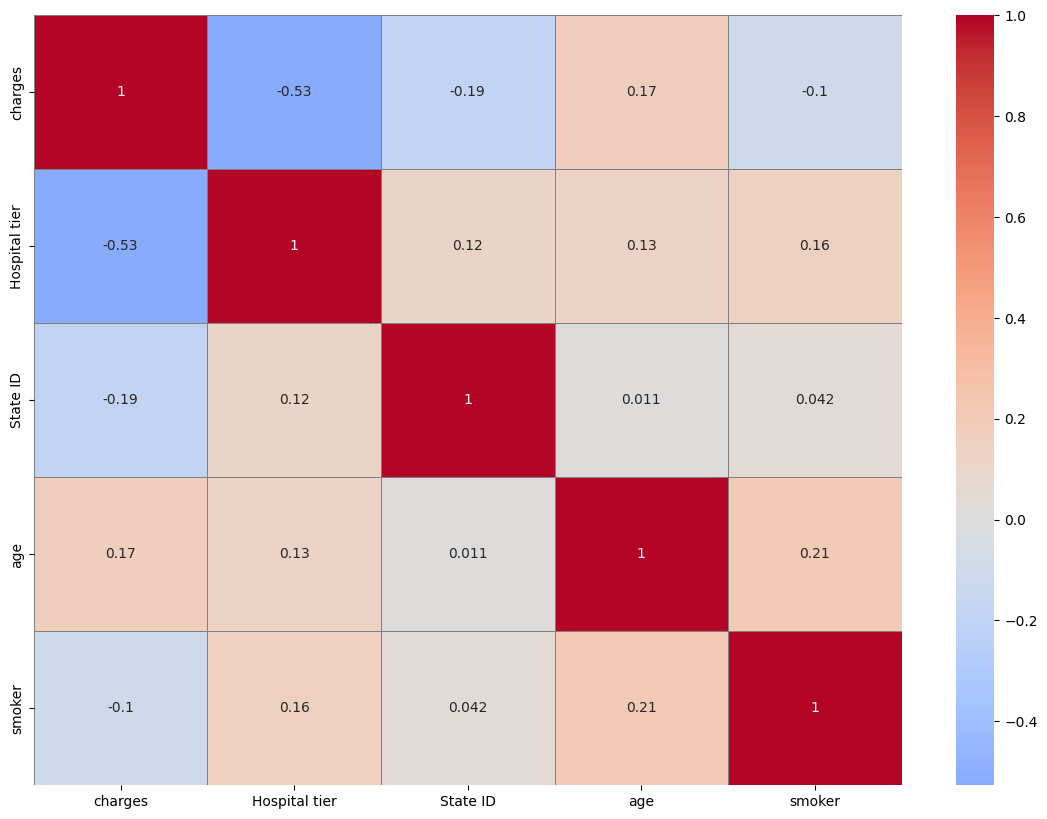

In [ ]:
corr_matrix = hdn.corr()
plt.figure(figsize=(14, 10))  # Increase size for better visibility

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, linecolor='gray')

# Display the heatmap
plt.show()